#### In this notebook we shall build a 'Locally Weighted Linear Regression Model' and will test it on a dataset:

In [1]:
#Importing the requisite Libraries/Packages:
from numpy import *

In [2]:
#Loading the data from a text file('ex0.txt'):
def loadDataSet(fileName):
    numFeat = len(open(fileName).readline().split('\t'))-1
    dataMat = []; labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = []
        curLine= line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        dataMat.append(lineArr)
        labelMat.append(float(curLine[-1]))
    return dataMat,labelMat

In [3]:
#Constructing the function for 'Locally Weighted Linear Regression Algorithm':
def lwlr(testPoint,xArr,yArr,k=1.0):
    xMat = mat(xArr); yMat = mat(yArr).T
    m = shape(xMat)[0]
    weights = mat(eye((m)))
    for j in range(m):
        diffMat = testPoint - xMat[j,:]
        weights[j,j] = exp(diffMat*diffMat.T/(-2.0*k**2))
    xTx = xMat.T * (weights * xMat)
    if linalg.det(xTx) == 0.0:
        print ("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (xMat.T * (weights * yMat))
    return testPoint * ws

In [4]:
#Testing the LWLR algorithm with a dataset:
def lwlrTest(testArr,xArr,yArr,k=1.0):
    m = shape(testArr)[0]
    yHat = zeros(m)
    for i in range(m):
        yHat[i] = lwlr(testArr[i],xArr,yArr,k)
    return yHat

In [5]:
#Splitting the data into 'Attributes(x)' and 'Labels(y)':
xArr,yArr = loadDataSet('ex0.txt')

In [7]:
#Testing the LWLR algorithm for k=1.0:
lwlr(xArr[0],xArr,yArr,1.0)

matrix([[3.12204471]])

In [8]:
#Testing the LWLR algorithm for k=0.001:
lwlr(xArr[0],xArr,yArr,0.001)

matrix([[3.20175729]])

In [12]:
#Testing the LWLR algorithm for k=0.0001:
lwlr(xArr[0],xArr,yArr,0.0001)

matrix([[3.17660182]])

In [27]:
#Predicting the values of 'Labels(y)' using k=0.003:
yHat = lwlrTest(xArr, xArr, yArr,0.003)

In [28]:
#Sorting the 'Attribute' array:
xMat = mat(xArr)
srtInd = xMat[:,1].argsort(0)
xSort = xMat[srtInd][:,0,:]

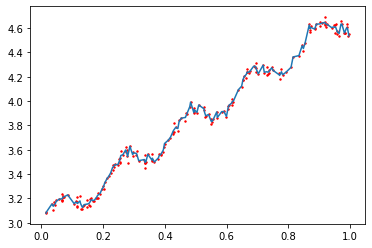

In [29]:
#Plotting the 'Actual' and 'Predicted' values of our 'Labels(y)':
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xSort[:,1],yHat[srtInd])
ax.scatter(xMat[:,1].flatten().A[0], mat(yArr).T.flatten().A[0] , s=2,c='red')
plt.show()